# Model Selection

In the context of image classification, convolutional neural networks (CNN) tend to perform better.  In this analysis, we will start with a simple CNN and iterate by adding layers until performance plateaus.

In [1]:
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras import optimizers
from keras.metrics import Recall, Precision, AUC
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale = 1./255)
train_it = datagen.flow_from_directory('../data/train/',
                                       class_mode='binary',
                                       target_size = (64,64),
                                       batch_size = 5132)
val_it = datagen.flow_from_directory('../data/val/',
                                     class_mode='binary',
                                     target_size = (64,64),
                                     batch_size = 100)
test_it = datagen.flow_from_directory('../data/test/',
                                      class_mode='binary', 
                                      target_size = (64,64),
                                      batch_size = 624)
X_train, Y_train = train_it.next()
X_val, Y_val = val_it.next()
X_test, Y_test = test_it.next()

Y_train = Y_train.reshape(5132,1)
Y_val = Y_val.reshape(100,1)
Y_test = Y_test.reshape(624,1)

Found 5132 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model 1 - Basic Convolutional Neural Net

For a baseline model, we use a simple 1 layer CNN with RELU activation, flatten, and 1 Dense binary output layer with a sigmoid activation.  For diagnostic purposes, we will measure the accuracy, precision, recall, and AUC, however, because this is a medical application, the most important metric is recall, because we want to eliminate false negatives (we would rather predict a healthy patient has pneumonia than predict someone with pneumonia be healthy).

In [6]:
# instantiate sequential NN
model = models.Sequential()
# first layer - convolutional 2d NN with relu activation, 3x3 kernal size
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))

# flattens the 2D input into a 1D input for the output layer
model.add(Flatten())
# output layer
model.add(Dense(1, activation='sigmoid'))
# compiled with adaptive moment estimation (adam), with binary cross-entropy loss function
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=15,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/15
161/161 [==============================] - 4s 24ms/step - loss: 0.2231 - acc: 0.9088 - precision_2: 0.9228 - recall_2: 0.9580 - auc_2: 0.9567 - val_loss: 0.1626 - val_acc: 0.9100 - val_precision_2: 0.8475 - val_recall_2: 1.0000 - val_auc_2: 0.9988
Epoch 2/15
161/161 [==============================] - 4s 22ms/step - loss: 0.1096 - acc: 0.9573 - precision_2: 0.9681 - recall_2: 0.9750 - auc_2: 0.9906 - val_loss: 0.2865 - val_acc: 0.8800 - val_precision_2: 0.8065 - val_recall_2: 1.0000 - val_auc_2: 0.9986
Epoch 3/15
161/161 [==============================] - 4s 22ms/step - loss: 0.0857 - acc: 0.9680 - precision_2: 0.9779 - recall_2: 0.9794 - auc_2: 0.9944 - val_loss: 0.0805 - val_acc: 0.9600 - val_precision_2: 0.9259 - val_recall_2: 1.0000 - val_auc_2: 1.0000
Epoch 4/15
161/161 [==============================] - 3s 22ms/step - loss: 0.0589 - acc: 0.9793 - precision_2: 0.9849 - recall_2: 0.9875 - auc_2: 0.9976 - val_loss: 0.1310 - val_acc: 0.9400 - val_precision_2: 0.8929 - val_r

#### Evaluation
The recall score of 0.997 is high, but we want to bring up everything else

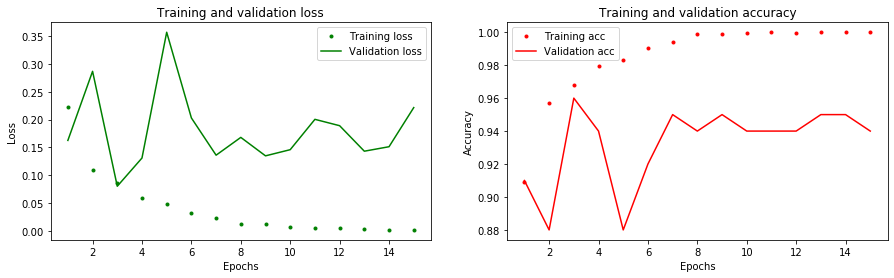

In [7]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The loss is lowest as 3 epochs, and the accuracy is highest at 3 epochs.

## Model 2

Here we add a max pooling layer and dropout layer

In [9]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=15,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/15
161/161 [==============================] - 6s 40ms/step - loss: 0.2714 - acc: 0.8878 - precision_4: 0.8927 - recall_4: 0.9658 - auc_4: 0.9395 - val_loss: 0.1527 - val_acc: 0.9300 - val_precision_4: 0.8909 - val_recall_4: 0.9800 - val_auc_4: 0.9968
Epoch 2/15
161/161 [==============================] - 6s 38ms/step - loss: 0.1142 - acc: 0.9562 - precision_4: 0.9686 - recall_4: 0.9729 - auc_4: 0.9906 - val_loss: 0.1977 - val_acc: 0.8900 - val_precision_4: 0.8197 - val_recall_4: 1.0000 - val_auc_4: 0.9976
Epoch 3/15
161/161 [==============================] - 6s 38ms/step - loss: 0.1004 - acc: 0.9612 - precision_4: 0.9695 - recall_4: 0.9789 - auc_4: 0.9915 - val_loss: 0.1036 - val_acc: 0.9400 - val_precision_4: 0.8929 - val_recall_4: 1.0000 - val_auc_4: 0.9980
Epoch 4/15
161/161 [==============================] - 6s 38ms/step - loss: 0.0843 - acc: 0.9690 - precision_4: 0.9779 - recall_4: 0.9807 - auc_4: 0.9947 - val_loss: 0.2048 - val_acc: 0.9200 - val_precision_4: 0.8621 - val_r

#### Evaluation


Blah

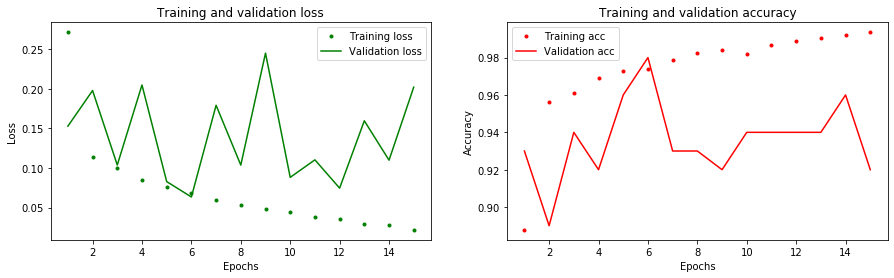

In [10]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 3

Here we add an extra conv layer

In [11]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=15,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/15
161/161 [==============================] - 14s 86ms/step - loss: 0.3223 - acc: 0.8618 - precision_5: 0.8655 - recall_5: 0.9650 - auc_5: 0.9101 - val_loss: 0.4424 - val_acc: 0.7800 - val_precision_5: 0.6944 - val_recall_5: 1.0000 - val_auc_5: 0.9882
Epoch 2/15
161/161 [==============================] - 13s 79ms/step - loss: 0.1755 - acc: 0.9337 - precision_5: 0.9472 - recall_5: 0.9650 - auc_5: 0.9739 - val_loss: 0.1525 - val_acc: 0.9600 - val_precision_5: 0.9423 - val_recall_5: 0.9800 - val_auc_5: 0.9926
Epoch 3/15
161/161 [==============================] - 14s 85ms/step - loss: 0.1208 - acc: 0.9540 - precision_5: 0.9663 - recall_5: 0.9723 - auc_5: 0.9881 - val_loss: 0.1650 - val_acc: 0.9200 - val_precision_5: 0.8750 - val_recall_5: 0.9800 - val_auc_5: 0.9940
Epoch 4/15
161/161 [==============================] - 12s 74ms/step - loss: 0.1049 - acc: 0.9589 - precision_5: 0.9706 - recall_5: 0.9744 - auc_5: 0.9910 - val_loss: 0.1074 - val_acc: 0.9600 - val_precision_5: 0.9423 - v

#### Evaluation

good stuff

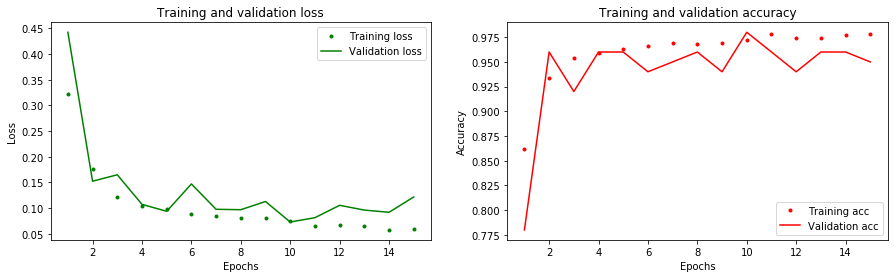

In [12]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 4

In [18]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/10
161/161 [==============================] - 14s 85ms/step - loss: 0.4599 - acc: 0.7662 - precision_10: 0.7653 - recall_10: 0.9909 - auc_10: 0.8048 - val_loss: 0.4126 - val_acc: 0.9000 - val_precision_10: 0.8333 - val_recall_10: 1.0000 - val_auc_10: 0.9936
Epoch 2/10
161/161 [==============================] - 13s 82ms/step - loss: 0.2626 - acc: 0.9221 - precision_10: 0.9229 - recall_10: 0.9773 - auc_10: 0.9718 - val_loss: 0.3881 - val_acc: 0.9500 - val_precision_10: 0.9091 - val_recall_10: 1.0000 - val_auc_10: 0.9920
Epoch 3/10
161/161 [==============================] - 12s 76ms/step - loss: 0.2310 - acc: 0.9431 - precision_10: 0.9513 - recall_10: 0.9736 - auc_10: 0.9782 - val_loss: 0.3815 - val_acc: 0.9500 - val_precision_10: 0.9091 - val_recall_10: 1.0000 - val_auc_10: 0.9886
Epoch 4/10
161/161 [==============================] - 12s 74ms/step - loss: 0.2146 - acc: 0.9501 - precision_10: 0.9611 - recall_10: 0.9726 - auc_10: 0.9811 - val_loss: 0.3239 - val_acc: 0.9500 - val_pr

#### Evaluation

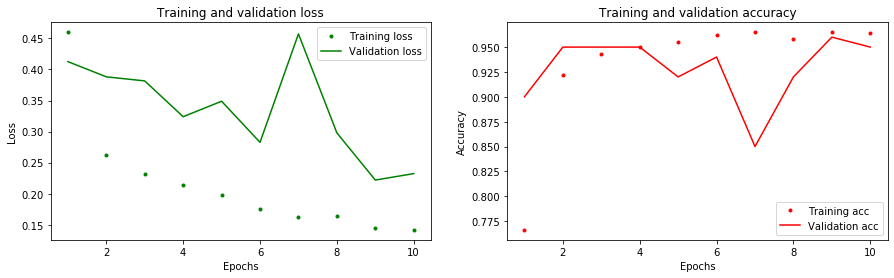

In [19]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 5

In [21]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=5,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/5
161/161 [==============================] - 20s 125ms/step - loss: 0.3879 - acc: 0.8270 - precision_12: 0.8276 - recall_12: 0.9705 - auc_12: 0.8464 - val_loss: 0.1625 - val_acc: 0.9300 - val_precision_12: 0.9574 - val_recall_12: 0.9000 - val_auc_12: 0.9908
Epoch 2/5
161/161 [==============================] - 18s 114ms/step - loss: 0.1830 - acc: 0.9281 - precision_12: 0.9499 - recall_12: 0.9541 - auc_12: 0.9716 - val_loss: 0.1530 - val_acc: 0.9500 - val_precision_12: 0.9412 - val_recall_12: 0.9600 - val_auc_12: 0.9920
Epoch 3/5
161/161 [==============================] - 17s 108ms/step - loss: 0.1399 - acc: 0.9458 - precision_12: 0.9625 - recall_12: 0.9650 - auc_12: 0.9832 - val_loss: 0.1697 - val_acc: 0.9400 - val_precision_12: 0.9074 - val_recall_12: 0.9800 - val_auc_12: 0.9932
Epoch 4/5
161/161 [==============================] - 17s 104ms/step - loss: 0.1235 - acc: 0.9564 - precision_12: 0.9723 - recall_12: 0.9692 - auc_12: 0.9859 - val_loss: 0.1875 - val_acc: 0.9200 - val_pr